In [21]:
import pandas as pd
%matplotlib inline

In [22]:
scaling = pd.read_csv('sec_README.dat', delim_whitespace=True)

In [23]:
scaling

ncores  MPI  threads       dip        Xo  Xo_REDUX        X  X_REDUX  \
0     160   20        8  583.8481  968.0000  370.6171  78.8978   2.3527   
1     320   40        8  300.4219  813.0000  418.4057  70.0725   2.4978   
2     640   80        8  161.2435  347.2946   89.7328  27.9303   1.0606   
3     960  120        8  114.3919  285.8686  122.2207  24.7197   0.8573   
4    1280  160        8  103.1717  245.0460   45.4286  11.7884   1.3935   
5    1600  200        8   80.3928  216.8466  112.6726  18.8975   1.7963   

     io_X   io_WF    Sgm_x  (REDUX)     Sgm_c  (REDUX).1  WALL_TIME  
0  2.8067  6.9154  14.8760   0.5407  157.4146    10.4370       1751  
1  1.5353  7.0519   7.9164   0.3321   80.2777     5.6059       1230  
2  1.7090  6.3824   4.5266   0.3851   39.8171     1.7326        571  
3  0.7204  4.9512   3.4017   0.4300   27.5321     2.0202        449  
4  5.1034  6.1404   2.9683   0.6057   21.0247     1.3995        398  
5  2.0857  3.5188   2.5124   0.3003   17.5020     1.1577        336

In [24]:
scaling['nodes'] = scaling['MPI']//4

In [25]:
scaling['ideal'] = scaling['nodes']/20

In [26]:
scaling.set_index('nodes', inplace=True)

In [27]:
scaling.drop([5,10], inplace=True)

In [28]:
scaling['speedup'] = scaling.WALL_TIME.max() / scaling.WALL_TIME

In [29]:
scaling['efficiency'] = scaling.speedup / scaling.ideal * 100

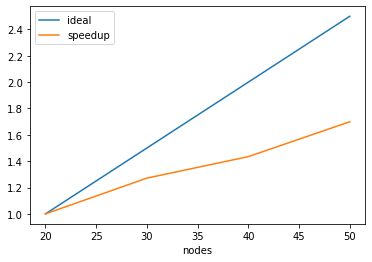

In [30]:
scaling[['ideal', 'speedup']].plot()

In [31]:
scaling

ncores  MPI  threads       dip        Xo  Xo_REDUX        X  X_REDUX  \
nodes                                                                         
20        640   80        8  161.2435  347.2946   89.7328  27.9303   1.0606   
30        960  120        8  114.3919  285.8686  122.2207  24.7197   0.8573   
40       1280  160        8  103.1717  245.0460   45.4286  11.7884   1.3935   
50       1600  200        8   80.3928  216.8466  112.6726  18.8975   1.7963   

         io_X   io_WF   Sgm_x  (REDUX)    Sgm_c  (REDUX).1  WALL_TIME  ideal  \
nodes                                                                          
20     1.7090  6.3824  4.5266   0.3851  39.8171     1.7326        571    1.0   
30     0.7204  4.9512  3.4017   0.4300  27.5321     2.0202        449    1.5   
40     5.1034  6.1404  2.9683   0.6057  21.0247     1.3995        398    2.0   
50     2.0857  3.5188  2.5124   0.3003  17.5020     1.1577        336    2.5   

        speedup  efficiency  
nodes                        
20     1.000000  100.000000  
30     1.271715   84.780995  
40     1.434673   71.733668  
50     1.699405   67.976190